In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
project_dir = "/eos/user/p/pinkaew/research/online-offline-jec"
sys.path.append(project_dir) # append project directory to path for import
os.chdir(project_dir) # change current working directory to project directory

In [3]:
import coffea
from coffea import util as cutil
from analysis.analysis_util import *
import matplotlib.ticker as mticker

In [4]:
hep.style.use("CMS")

In [5]:
output_dir = "coffea_output"
output_filename = "QCD_2022_AK4PUPPI_AK4Scouting_notrigger_tagprobe20_min0_tp100_simul.coffea"
out = cutil.load(os.path.join(output_dir, os.path.splitext(output_filename)[0], output_filename))

In [6]:
h = out["tp_asymmetry"]["QCD", "AK4Scouting", :, slice(-1.3j, 1.3j, sum), :]

In [7]:
h.profile("tp_asymmetry").values()[20]

-0.0019304674160650981

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8f0a4eb730>, errorbar=None, legend_artist=None)]

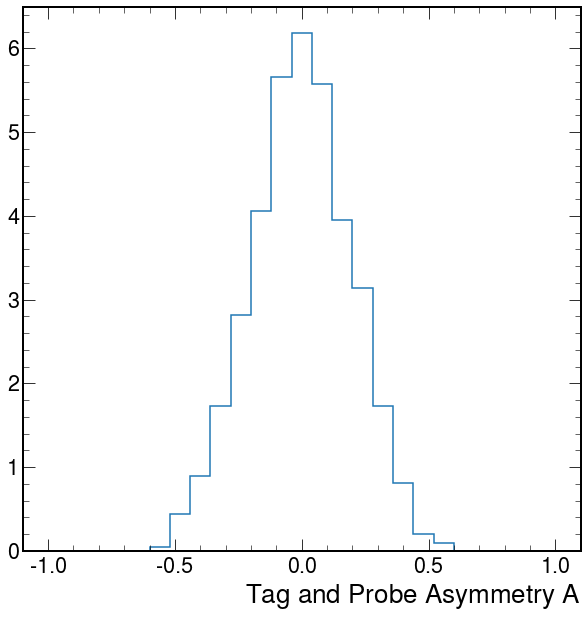

In [8]:
fig, ax = plt.subplots()
h_asym = h[20, :][..., ::hist.rebin(8)]
h_asym.plot(ax=ax, yerr=False)

In [9]:
num_experiments = 15000

In [10]:
n_events = h.values()
asym_centers = h_asym.axes["tp_asymmetry"].centers

In [11]:
toy_exps = np.random.default_rng().poisson(np.expand_dims(n_events, axis=-1), 
                                           size=(*n_events.shape, num_experiments))

In [12]:
def run_pseudo_experiments(h, num_experiments=1000, seed=None):
    if seed is not None:
        np.random.seed(seed)
    nominal_experiment = h.values()
    pseudo_experiments = np.random.default_rng().poisson(np.expand_dims(nominal_experiment, axis=0), 
                                                         size=(num_experiments, *nominal_experiment.shape))
    return pseudo_experiments

In [13]:
def estimate_error_from_pseudo_experiments(h, func, num_experiments=1000, seed=None):
    return

In [14]:
xsec = 1438000000.0
lumi = 35e3

In [15]:
h = out["tp_asymmetry"]["QCD", "AK4Scouting", :, slice(-1.3j, 1.3j, sum), :]
h = h[..., ::hist.rebin(8)]
pseudo_exps = run_pseudo_experiments(h*xsec*lumi, 10, seed=0)

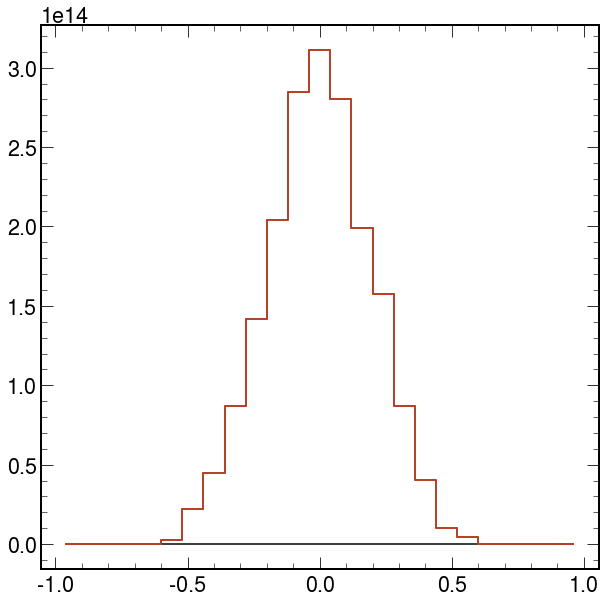

In [16]:
fig, ax = plt.subplots()
pt_bin_idx = 20
centers = h.axes["tp_asymmetry"].centers
nominal_exp = h.values()[pt_bin_idx]*xsec
ax.step(centers, nominal_exp, color="k", where="mid", label="nominal")
for exp_idx in range(num_experiments):
    if exp_idx >= 4:
        break
    ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx], where="mid")

/tmp/ipykernel_14081/2130072224.py:9: RuntimeWarning: invalid value encountered in true_divide
  ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx]/nominal_exp, where="mid")
/tmp/ipykernel_14081/2130072224.py:9: RuntimeWarning: invalid value encountered in true_divide
  ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx]/nominal_exp, where="mid")
/tmp/ipykernel_14081/2130072224.py:9: RuntimeWarning: invalid value encountered in true_divide
  ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx]/nominal_exp, where="mid")
/tmp/ipykernel_14081/2130072224.py:9: RuntimeWarning: invalid value encountered in true_divide
  ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx]/nominal_exp, where="mid")


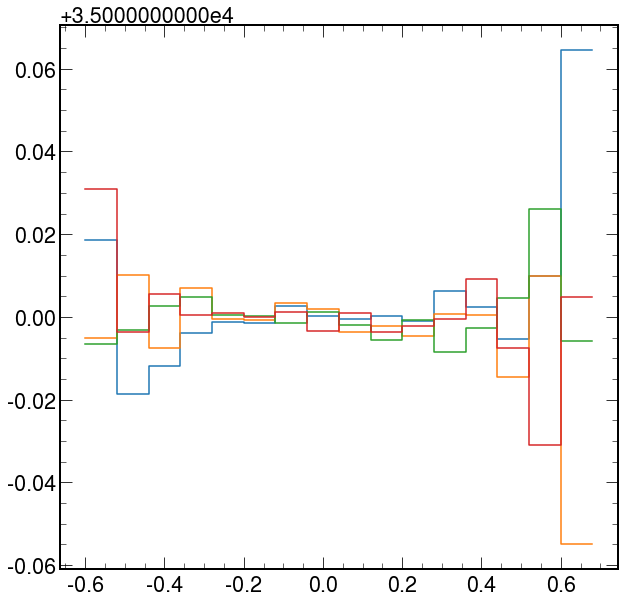

In [17]:
fig, ax = plt.subplots()
pt_bin_idx = 20
centers = h.axes["tp_asymmetry"].centers
nominal_exp = h.values()[pt_bin_idx]*xsec
#ax.step(centers, nominal_exp, color="k", label="nominal")
for exp_idx in range(num_experiments):
    if exp_idx >= 4:
        break
    ax.step(centers, pseudo_exps[exp_idx, pt_bin_idx]/nominal_exp, where="mid")

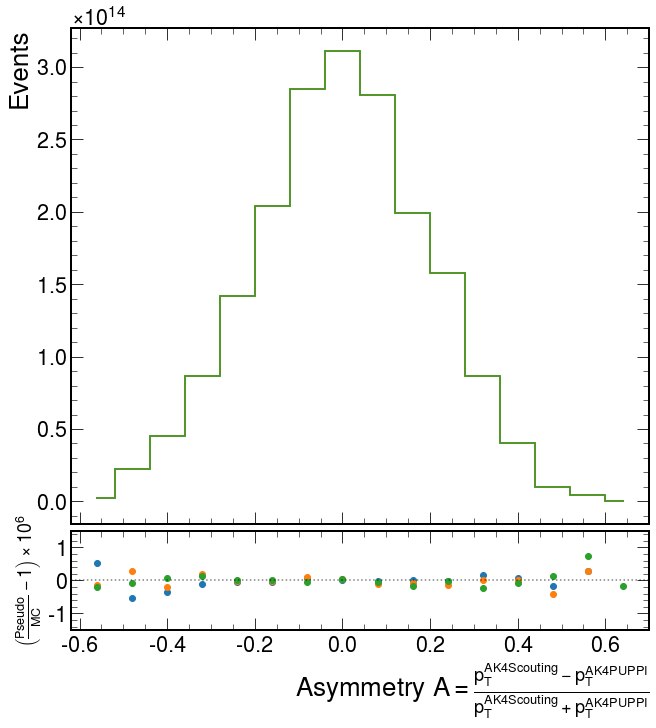

In [28]:
fig, (ax, ratio_ax) = plt.subplots(figsize=(9, 10), 
                                   nrows=2, 
                                   gridspec_kw={'height_ratios': [5, 1]},
                                   constrained_layout = True)
pt_bin_idx = 20
num_exps_to_plot = 3
mask = nominal_exp > 0
centers = h.axes["tp_asymmetry"].centers
nominal_exp = h.values()[pt_bin_idx]*xsec*lumi
ratio_scale_order = 6
ax.step(centers[mask], nominal_exp[mask], color="k", where="mid", label="nominal")
for exp_idx in range(num_experiments):
    if exp_idx >= num_exps_to_plot:
        break
    ax.step(centers[mask], pseudo_exps[exp_idx, pt_bin_idx][mask], where="mid")
    ratio = ((pseudo_exps[exp_idx, pt_bin_idx])[mask]/nominal_exp[mask]-1) * (10**ratio_scale_order)
    ratio_ax.plot(centers[mask], ratio, "o")
    #ratio_ax.step(centers[mask], ratio, where="mid")
    
ax.xaxis.set_ticklabels([])
ax.set_ylabel("Events")
formatter = mticker.ScalarFormatter(useMathText=True)
ax.yaxis.set_major_formatter(formatter)

ratio_plot_margin = 1.5
ratio_ax.axhline(y=0, linestyle="dotted", color="k", alpha=0.5)
ratio_ax.set_ylim(-ratio_plot_margin, ratio_plot_margin)
ratio_ax.set_ylabel(r"$\left(\frac{Pseudo}{MC} - 1\right)\times10^%s$"%(ratio_scale_order), 
                    loc="center", fontsize=18)
ratio_ax.set_xlabel(r"Asymmetry $A=\frac{p_T^{AK4Scouting}-p_T^{AK4PUPPI}}{p_T^{AK4Scouting}+p_T^{AK4PUPPI}}$")

plt.show()